# SeCaPr - Sequence Capture Processor
A computational pipeline for processing Illumina sequence capture data

## Installation & Setup
SeCaPr is available as a conda package on the bioconda channel. This makes installation very simple:

#### 1. Install conda

If you do not have conda installed, got to [this page](https://conda.io/docs/install/quick.html) and follow the instrucitons for you system. Conda is a software and environment manager, that makes installation of new software and of required dependencies very simple and straightforward.

#### 2. Install SeCaPr
Now you can simply type the following command and conda will install the SeCaPr pipeline

    conda install -c bioconda secapr

#### 3. Install the SeCaPr environment (all correct software dependencies)
Conda also makes it super easy to install all necessary dependencies. These will be saved as a conda environment, which you can activate or deactivate. Install the environment with this command:

    conda create -n secapr_env -c bioconda secapr
   
#### 4. Activate the environment
To activate the newly created environment, type:

    source activate secapr_env

After you are done using secapr, you can deactivate the environment to switch back to your standard environment with this command:

    source deactivate
    
But let's NOT deactivate it for now!

#### 5. Check active environment
Check if you are connected to the correct environment (there should eb a star in front of secapr_env in the output of this command):

    conda info --envs
    
## IMPORTANT!!! --> whenever you are using this pipeline, make sure the secapr_env is activated

## Cleaning and trimming of fastq files
Your fastq reads that you received from the sequencing facility will most likely contain all raw reads, including low quality reads. Further, most if not all reads will probably contain parts of the Illumina adapter sequences, which are attached on both ends of the read. In order to prepare the reads for further steps, we need to make sure that we properly clean them and that we clip off all remaining adapter contaminations.

**Note: Please check: Is secapr_env activated??**

The program for cleaning and trimming can be called as follows:

In [3]:
%%bash
secapr clean_reads -h

usage: secapr clean_reads [-h] --input INPUT --config CONFIG --output OUTPUT
                          [--read_min READ_MIN] [--index {single,double}]

Clean and trim raw Illumina read files

optional arguments:
  -h, --help            show this help message and exit
  --input INPUT         The directory containing the unzipped .fastq or .fq
                        files (raw read files)
  --config CONFIG       A configuration file containing the adapter
                        information and the sample names
  --output OUTPUT       The output directory where results will be saved
  --read_min READ_MIN   Set the minimum read count threshold. Any read file
                        containing fewer reads than this minimum threshold
                        will not be processed further. Default: 200000
  --index {single,double}
                        Specify if single- or double-indexed adapters were
                        used for the library preparation (essential
                    

Example command:

    secapr clean_reads --input data/raw/fastq/ --config data/raw/adapter_info.txt --output data/processed/cleaned_trimmed_reads_test --index single

## Testing read quality
Now we want to check if the cleaning and trimming was successful. For this purpose there exists a perfect tool called 'fastqc' which returns reports for every fastq file, summarizing many different parameters concerning read quality.

**Note: Please check: Is secapr_env activated??**

 First install the tool:

    conda install -c bioconda fastqc

Now make file containing a list of all cleaned fastq-files of interest:

In [23]:
%%bash
for dir in data/processed/cleaned_trimmed_reads/*/*READ1.fastq; do echo $dir; done > data/processed/fastq_file_list.txt
for dir in data/processed/cleaned_trimmed_reads/*/*READ2.fastq; do echo $dir; done >> data/processed/fastq_file_list.txt
cat data/processed/fastq_file_list.txt

data/processed/cleaned_trimmed_reads/1061_clean/1061_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1063_clean/1063_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1064_clean/1064_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1065_clean/1065_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1068_clean/1068_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1070_clean/1070_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1073_clean/1073_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1074_clean/1074_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1079_clean/1079_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1080_clean/1080_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1082_clean/1082_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1083_clean/1083_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1085_clean/1085_clean-READ1.fastq
data/processed/cleaned_trimmed_reads/1086_clean/1086_clean-READ1.fastq
data/p

In [24]:
%%bash
#conda install -c bioconda fastqc
exec 2> /dev/null
mkdir data/processed/fastqc_results
fastqc -o data/processed/fastqc_results -f fastq $(cat data/processed/fastq_file_list.txt)

Analysis complete for 1061_clean-READ1.fastq
Analysis complete for 1063_clean-READ1.fastq
Analysis complete for 1064_clean-READ1.fastq
Analysis complete for 1065_clean-READ1.fastq
Analysis complete for 1068_clean-READ1.fastq
Analysis complete for 1070_clean-READ1.fastq
Analysis complete for 1073_clean-READ1.fastq
Analysis complete for 1074_clean-READ1.fastq
Analysis complete for 1079_clean-READ1.fastq
Analysis complete for 1080_clean-READ1.fastq
Analysis complete for 1082_clean-READ1.fastq
Analysis complete for 1083_clean-READ1.fastq
Analysis complete for 1085_clean-READ1.fastq
Analysis complete for 1086_clean-READ1.fastq
Analysis complete for 1087_clean-READ1.fastq
Analysis complete for 1140_clean-READ1.fastq
Analysis complete for 1166_clean-READ1.fastq
Analysis complete for 1061_clean-READ2.fastq
Analysis complete for 1063_clean-READ2.fastq
Analysis complete for 1064_clean-READ2.fastq
Analysis complete for 1065_clean-READ2.fastq
Analysis complete for 1068_clean-READ2.fastq
Analysis c

You should spend some time going through the quality reports and make sure all samples passed all tests. Most likely there will be some warnings or even some failed tests for some samples. In that case go back to the cleaning step and set the parameters differently, in order to brush out the bumps in the tests. Preferably all samples should pass all tests (there may still be some warnings) before you continue to the next step.

We provide an R-script which gives a graphical overview over the test results of all samples. This makes it easier to see if all samples passed the tests (rather than having to go open each individual report):

In [28]:
%%bash
exec 2> /dev/null
Rscript src/fastqc_visualization.r -i data/processed/fastqc_results/ -o data/processed/fastqc_results/summary_all_samples.pdf

null device 
          1 
null device 
          1 
null device 
          1 
The following sample failed at least one test: 1061 

The following sample failed at least one test: 1063 

The following sample failed at least one test: 1064 

The following sample failed at least one test: 1065 

The following sample failed at least one test: 1068 

The following sample failed at least one test: 1070 

The following sample failed at least one test: 1073 

The following sample failed at least one test: 1074 

The following sample failed at least one test: 1079 

The following sample failed at least one test: 1080 

The following sample failed at least one test: 1082 

The following sample failed at least one test: 1083 

The following sample failed at least one test: 1085 

The following sample failed at least one test: 1086 

The following sample failed at least one test: 1087 

The following sample failed at least one test: 1140 

The following sample failed at least one test: 1166 



The output is shown below. On the first page you can see the counts of 'fail'(red),'pass'(green) and 'warn'(blue) for each test category. You want to make sure to change the settings until there are no more red columns left. The second page shows the test results on a per sample basis, which helps identifying the problemtic samples

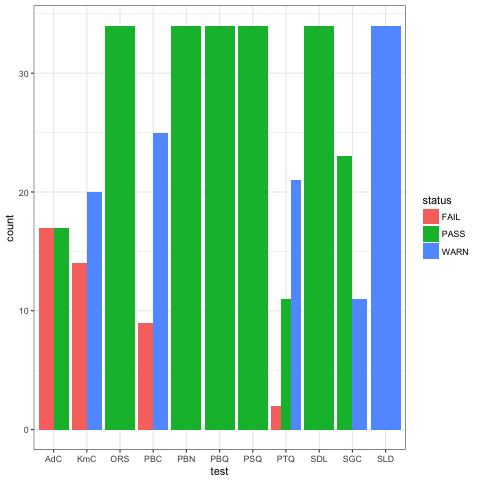

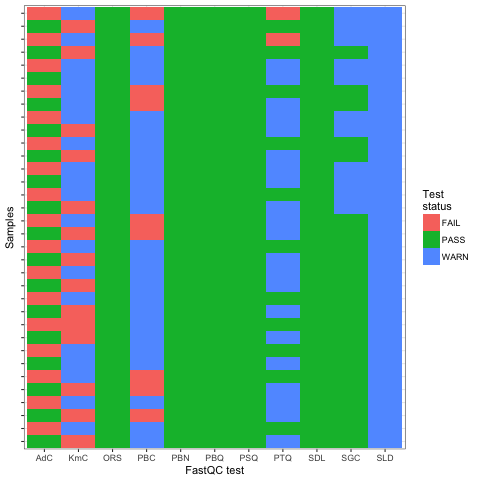

In [40]:
from IPython.display import Image, display
img1 = Image("data/processed/fastqc_results/summary_all_samples1.png")
img2 = Image("data/processed/fastqc_results/summary_all_samples2.png")
display(img1,img2)